平均スコア [[ 3.65838938]]
平均スコア [[ 3.42886917]]
平均スコア [[ 1.03023235]]
平均スコア [[ 3.05562832]]
平均スコア [[ 3.66476917]]
平均スコア [[ 3.43984089]]
平均スコア [[ 1.18495612]]
平均スコア [[ 4.086986]]
平均スコア [[ 3.68930869]]
平均スコア [[ 3.48697905]]
平均スコア [[ 1.62983034]]
平均スコア [[ 5.95001747]]
平均スコア [[ 3.71084379]]
平均スコア [[ 3.52496692]]
平均スコア [[ 1.93267037]]
平均スコア [[ 6.63483864]]
最適なhは 0.5 　最適なλは 0.05
スコアは 1.03023235304
処理にかかった時間:  11.462579011917114


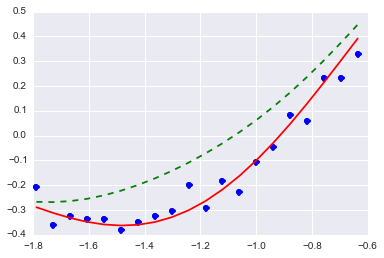

In [1]:
from numpy.linalg import inv
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline



"""制約付き最小二乗法"""
def rols(y, X, lmd = 0):
    Xsq = (X.T).dot(X)
    res = np.linalg.inv( Xsq + lmd*np.identity(Xsq.shape[0])).dot(X.T).dot( np.matrix(y).T)
    return res


"""ガウスカーネル 　第二引数が学習データ"""
def gaus(X, c, h):
    rownum = X.shape[0]
    rownum2 = c.shape[0]
    K = np.zeros([rownum, rownum2])
    for i in range(0, rownum):
            for j in range(0, rownum2):
                norm = np.power(np.linalg.norm(X[i] - c[j]), 2)
                k = np.exp(-norm/(2*np.power(h, 2)))
                K[i][j] = k
    return K


"""#データを5等分する"""
def split( X, n = 5):
    m = np.vsplit(X, n)
    return m


        
"""
データ生成
"""

# n = 50
# N=1000

def datagen(N):
    X = np.linspace(-3., 3., N)
    pix = math.pi*X
    y=np.sin(pix)/(pix)+0.1*X+0.05*(np.random.randn(N))
    ytrue=np.sin(pix)/(pix)+0.1*X
    mat = np.c_[ytrue, y, X ]
    return mat

    

# clust = 10
# h=0.2
# ld = 0
# k = gaus(x, x ,h)
# K = gaus(X,x,h)

# res =rols(y, k, ld)
# F = K.dot(res)



# plt.plot(x, y, "bo")
# plt.plot(x, ytrue, "-r")
# plt.plot(X, F, "g-")


# plt.show()

###λ＝０で不安定になることを確認
# title = "h : " + str(h) + " λ : "+ str(ld)
# plt.subplot(2, 1, 1)
# plt.title(title)
# plt.plot(x, y, "bo")
# plt.plot(x, ytrue, "-r")
# plt.plot(x, F, "g-")

# title = "h : " + str(h) + " λ : "+ "0"
# res =rols(y, k, 0)
# F = k.dot(res)

# plt.subplot(2, 1, 2)
# plt.title(title)
# plt.plot(x, y, "bo")
# plt.plot(x, ytrue, "-r")
# plt.plot(x, F, "g-")

# plt.tight_layout()

def loop(X, i,h, ld):
    Xtest = X[i]
    X.pop(i)
    #k-1個の行列を結合、任意の個数の行列の結合法がわからないので応急処置
    Xlearn = np.r_[ X[0], X[1], X[2], X[3] ] 
    k = gaus(Xlearn[:,2], Xlearn[:,2] ,h)
    K = gaus(Xtest[:,2],Xlearn[:,2],h)
    res =rols(Xlearn[:,1], k, ld)
    F = K.dot(res)
    residual = F - np.matrix(Xtest[:,0]).T
    sum = 0
    for i in residual:
        sum += np.power(i,2)
    return sum
    
    


#kfoldingsを実行　引数はデータ、ｈ、λ
def kf(datas, h, ld):
    mats4len = split(datas)  #参照渡しの問題を排除するため
    sum = 0
    for i in range(0, len(mats4len)):
        mats = split(datas)  
        sum += loop(mats, i, h, ld)
    ruler = sum/5
    print("平均スコア", ruler)
    return ruler

ld = [0.05, 0.1, 0.5, 1.2]
h = [0.05, 0.1, 0.5, 1.2]

start = time.time()#実行時間測定開始

datas = datagen(100)
answer =[]
#スコアを格納
for i in ld:
    for j in h:
        mean = kf(datas, j, i)
        answer.append([j, i,  mean[0,0]])
#最小スコアを算出
optimiser = []
for i in range(0, len(answer)):
    if i == 0:
        optimiser.append(answer[0])
    else:
        if answer[i][2] < optimiser[0][2]:
            optimiser[0][0] = answer[i][0]
            optimiser[0][1] = answer[i][1] 
            optimiser[0][2] = answer[i][2]
print("最適なhは",optimiser[0][0],"　最適なλは", optimiser[0][1])
print("スコアは",optimiser[0][2])
    
#実行時間測定終了、表示
elapsed_time = time.time() - start
print("処理にかかった時間: ", elapsed_time)

h = optimiser[0][0]
ld =optimiser[0][1]
Z= split(datas)  
Ztest = Z[1]
Z.pop(1)
#k-1個の行列を結合、任意の個数の行列の結合法がわからないので応急処置
Zlearn = np.r_[ Z[0], Z[1], Z[2], Z[3] ] 
k = gaus(Zlearn[:,2], Zlearn[:,2] ,h)
K = gaus(Ztest[:,2],Zlearn[:,2],h)
res =rols(Zlearn[:,1], k, ld)
F = K.dot(res)


plt.plot(Ztest[:,2], Ztest[:,1], "bo")
plt.plot(Ztest[:,2], F, "g--")
plt.plot(Ztest[:,2], Ztest[:,0], "-r")


plt.show()

<h2>HW3−2：ガウスカーネルモデルに対してスパース回帰の解を交互方向乗数法で求めよ</h2>

In [2]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv

def datagen(N):
    X = np.linspace(-3., 3., N)
    pix = math.pi*X
    y=np.sin(pix)/(pix)+0.1*X+0.05*(np.random.randn(N))
    ytrue=np.sin(pix)/(pix)+0.1*X
    mat = np.c_[ytrue, y, X ]
    return mat

"""ガウスカーネル 　第二引数が学習データ"""
def gaus(X, c, h):
    rownum = X.shape[0]
    rownum2 = c.shape[0]
    K = np.zeros([rownum, rownum2])
    for i in range(0, rownum):
            for j in range(0, rownum2):
                norm = np.power(np.linalg.norm(X[i] - c[j]), 2)
                k = np.exp(-norm/(2*np.power(h, 2)))
                K[i][j] = k
    return K


#θ更新式
def updtheta(K, y, z, u):
    Ksq = (K.T).dot(K)
    one = np.linalg.inv( Ksq + np.identity(Ksq.shape[0]))
    two = z + (K.T).dot(y) - u
    newtheta = one.dot(two)
    return newtheta

#ｚ更新式
def updz(newtheta, z, u, lmd, n):
    a = np.zeros([1, n]).T
    b = np.zeros([1, n]).T
    if np.linalg.norm(u + newtheta - lmd) > 0:
        a = u + newtheta - lmd
    if np.linalg.norm(u + newtheta + lmd) < 0:
        b = u + newtheta + lmd
    newz = a + b
    return newz

#ｕ更新式
def updu(newtheta, newz, u):
    newu = u + newtheta - newz
    return newu



n=100
h=0.5
#初期値
theta = np.ones([1,n]).T*(-0.5)
z = np.ones([1,n]).T*(-0.5)
u = np.ones([1,n]).T*(-0.5)
lmd = np.ones([1,n]).T*0.2
prior = [theta,z,u]

data = datagen(n)
ytrue = data[:,0]
y = np.matrix(data[:,1]).T
X = np.matrix(data[:,2]).T
K = np.matrix(gaus(X, X, h)).T

norms = np.zeros((3, 1))
# vals = np.array([[theta, z, u]]).T
aprxans = [0,0,0]
#更新式呼び出し
def compnorm(K, y, z, u, lmd,norms, vals, aprxans):
    newtheta = updtheta(K, y, z, u)
    newz = updz(newtheta, z, u, lmd, n)
    newu = updu(newtheta, newz, u)
    thetanorm = np.linalg.norm(newtheta - prior[0])
    znorm = np.linalg.norm(newz - prior[1])
    unorm = np.linalg.norm(newu - prior[2])
    """ノルムが十分に小さくなるまで答えの値を更新し続ける"""
    if thetanorm >0.001 :
        aprxans[0] = newtheta
    if znorm >0.001 :
        aprxans[1] = newz
    if unorm >0.001 :
        aprxans[2] = newu
    prior[0]= newtheta
    prior[1] = newz
    prior[2] = newu
    norms= np.c_[norms, np.array([[thetanorm, znorm, unorm]]).T]
#     vals= np.c_[vals, np.array([[newtheta, newz, newu]]).T]
    
    return norms , vals

#ADMMのループ回数　　4回で収束するので4回にしてある
rep = 4
for i in range(0,rep):    
    norms,vals = compnorm(K, y, prior[1], prior[2],  lmd, norms, vals, aprxans)
    

# print("ノルム", norms)
print("θ:\n ", aprxans[0].T)
print("z : \n", aprxans[1].T)
print("u : \n", aprxans[2].T)

plt.title("Sample data")
plt.plot( X, y, "bo")
plt.plot(X, ytrue, "r-")

plt.show()

plt.title("Movements of ADMM results solving L1 Regularised Least Square")
plt.plot( norms[0, 1:], "b-")
plt.plot( norms[1, 1:], "g-")
plt.plot(norms[2, 1:], "-r")


plt.show()

NameError: name 'vals' is not defined